In [6]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/content/Submission.csv.zip')

In [7]:
data

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205
...,...,...,...,...
5676,5676,FDB58,OUT046,2125.984810
5677,5677,FDD47,OUT018,2602.671833
5678,5678,NCO17,OUT045,1832.451358
5679,5679,FDJ26,OUT017,3538.685188


In [8]:
train = pd.read_csv('/content/big mart sales Train.csv.zip')
test = pd.read_csv('/content/big mart sales test.csv (2).zip')
test1 = test.copy()
train.shape,test.shape

((8523, 12), (5681, 11))

In [9]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
test["Outlet_Size"].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [11]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [13]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
map1 = {"Small":1,"Medium":2,"High":3}
train["Outlet_Size"] = train["Outlet_Size"].map(map1)
train["Item_Weight"] = train["Item_Weight"].fillna(train.Item_Weight.mean())
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].median())

In [47]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.92,0.019278,48.2692,443.4228,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,17.50,0.016760,141.6180,2097.2700,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,19.20,0.000000,182.0950,732.3800,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,994.7052,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [15]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
map1 = {"Small":1,"Medium":2,"High":3}
test["Outlet_Size"] = test["Outlet_Size"].map(map1)
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].median())

In [17]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


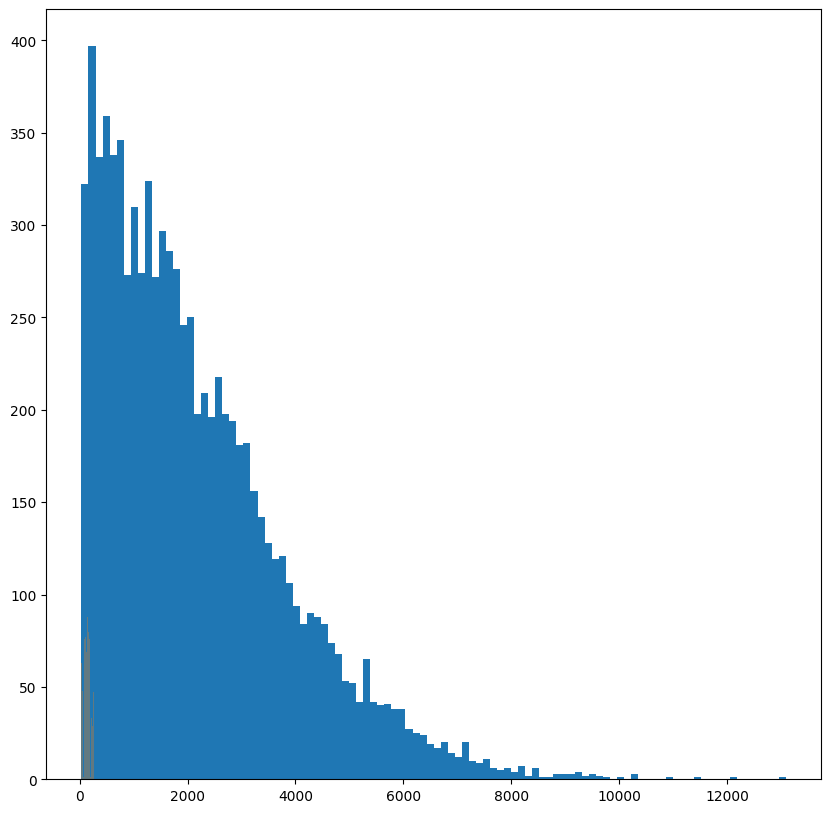

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,10)
plt.hist(train["Item_Outlet_Sales"],bins = 100)
# plt.show()

# plt.rcParams['figure.figsize'] = (10,10)
plt.hist(train["Item_MRP"],alpha = 0.3,bins = 150)
plt.show()

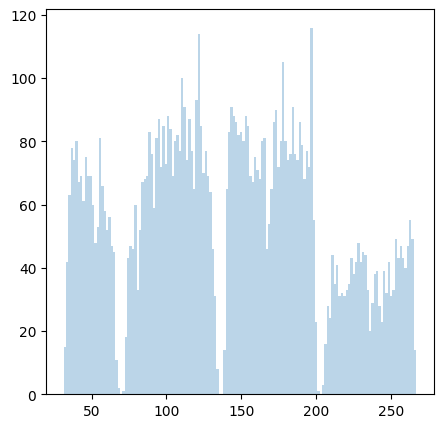

In [19]:
plt.rcParams['figure.figsize'] = (5,5)
plt.hist(train["Item_MRP"],alpha = 0.3,bins = 150)
plt.show()

<ipython-input-25-87b30def2bf3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train["Outlet_Location_Type"],palette = 'dark')


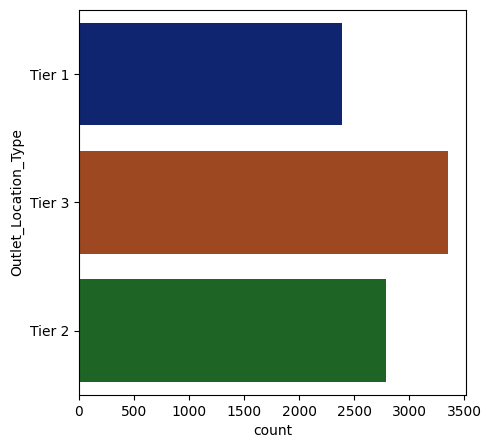

In [25]:
sns.countplot(train["Outlet_Location_Type"],palette = 'dark')
plt.show()

<ipython-input-26-037aa553c9d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train["Outlet_Size"],palette = 'dark')


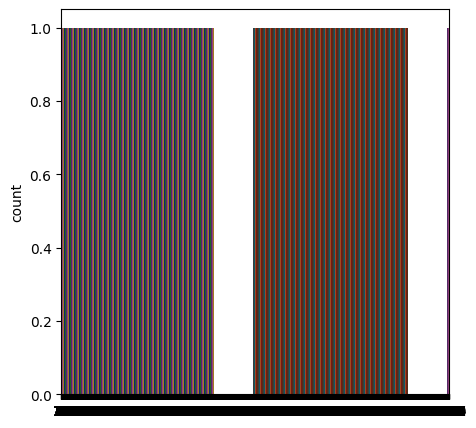

In [26]:
sns.countplot(train["Outlet_Size"],palette = 'dark')
plt.show()

<ipython-input-27-73f0ef426e16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train["Outlet_Type"],palette = 'RdYlGn')


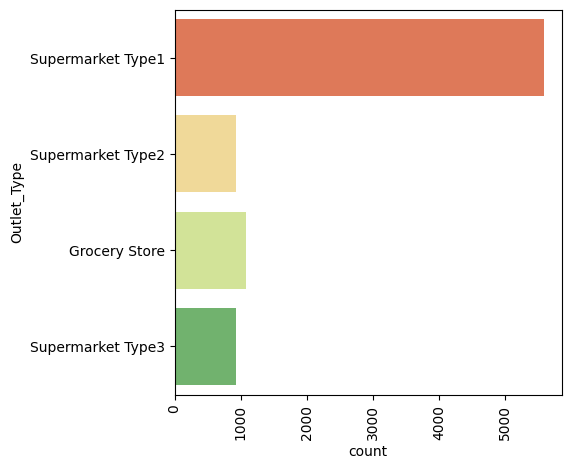

In [27]:
sns.countplot(train["Outlet_Type"],palette = 'RdYlGn')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
sns.violinplot(x=train["Outlet_Size"],y=train["Item_Outlet_Sales"],hue = train["Outlet_Size"],palette = "Reds")
plt.legend()
plt.show()

In [28]:
train.drop(labels = ["Outlet_Establishment_Year"],inplace = True,axis =1)
test.drop(labels = ["Outlet_Establishment_Year"],inplace = True,axis =1)

In [29]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(train[feat])
train = pd.concat([train,X],axis=1)

In [30]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2.0,Tier 1,Supermarket Type1,...,False,False,False,False,False,False,False,False,False,False
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2.0,Tier 3,Supermarket Type2,...,False,False,False,False,False,False,False,False,True,False
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2.0,Tier 1,Supermarket Type1,...,False,False,False,False,True,False,False,False,False,False
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2.0,Tier 3,Grocery Store,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3.0,Tier 3,Supermarket Type1,...,False,False,False,True,False,False,False,False,False,False


In [31]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X1 = pd.get_dummies(test[feat])
test = pd.concat([test,X1],axis=1)

In [32]:
train.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)
test.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type"],axis=1,inplace = True)

In [33]:
X_train = train.drop(labels = ["Item_Outlet_Sales"],axis=1)
y_train = train["Item_Outlet_Sales"]
X_train.shape,y_train.shape

((8523, 31), (8523,))

In [34]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.92,0.019278,48.2692,443.4228,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,17.50,0.016760,141.6180,2097.2700,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,19.20,0.000000,182.0950,732.3800,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,994.7052,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [35]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [36]:
from sklearn import preprocessing

x = X_train.values #returns a numpy array
test_s = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
df_train = pd.DataFrame(x_scaled_train)
df_test = pd.DataFrame(x_scaled_test)

In [37]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.282525,0.048866,0.927507,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,0.000000,0.640093,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

KeyError: '0'

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series[0]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel(0)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series[1]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel(1)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series[2]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel(2)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series[3]
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel(3)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.4)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
preds = model.predict(X_test)

In [41]:
preds

array([1373.375, 1931.875, 2367.875, ..., 3070.875, 2895.125, -493.875])

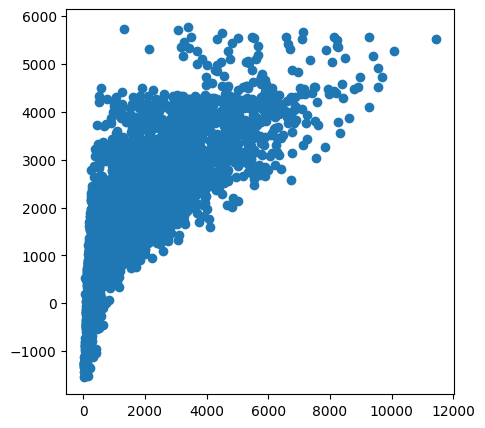

In [42]:
plt.scatter(y_test, preds)
plt.show()

<ipython-input-43-25663c471723>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-preds),bins=50)


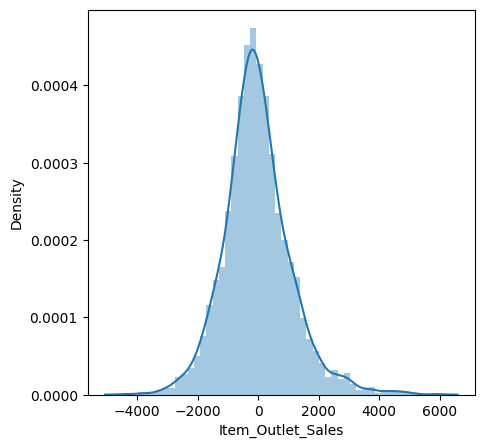

In [43]:
sns.distplot((y_test-preds),bins=50)
plt.show()

In [44]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 828.0535762463343
MSE: 1240716.6930176248
RMSE: 1113.8746307451413


In [45]:
predictions = model.predict(df_test)
final = pd.DataFrame({"Item_Identifier":test1["Item_Identifier"],"Outlet_Identifier":test1["Outlet_Identifier"],"Item_Outlet_Sales":abs(predictions)})
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1810.375
1,FDW14,OUT017,1308.000
2,NCN55,OUT010,1765.750
3,FDQ58,OUT017,2554.875
4,FDY38,OUT027,5217.875


In [46]:
final.to_csv('Submiss1.csv',index=False,header=True)